In [40]:
import pandas as pd
import numpy as np
from IPython.display import display

In [4]:
data=pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
data=data.iloc[: , 2:]

In [19]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [21]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [24]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

[133 245 396]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9434,1042,1235,436,256,396
1,3062,6154,13916,230,8933,2784
2,4515,11991,9345,2644,3378,2213


Quartile Visualization


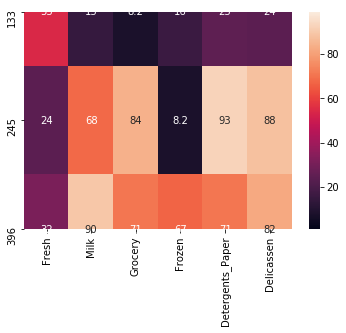

In [32]:
np.random.seed(15)
indices = np.random.choice(440, 3)
indices = np.sort(indices)
print(indices)
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

print("Quartile Visualization")
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

In [35]:
dt = data.copy()
dt['Total'] = dt.sum(axis=1)

for key in dt.keys():
    dt[key] = dt[key] / dt.Total * 100

dt = dt.drop(['Total'], axis =1)
sps = pd.DataFrame(dt.loc[indices], columns = dt.keys()).reset_index(drop = True)
print('Percentage of each categories (displayed by % below):')
display(sps)

Percentage of each categories (displayed by % below):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,73.708884,8.141261,9.649191,3.406516,2.000156,3.093992
1,8.728869,17.543259,39.670458,0.655663,25.465378,7.936372
2,13.245907,35.178666,27.415948,7.756850,9.910227,6.492402


In [42]:
print('Chosen samples standardized by mean of dataset:')
display((samples - np.around(data.mean().values)) / data.std())

print('Chosen samples offset from median of dataset:')
display(samples - np.around(data.median().values))

Chosen samples standardized by mean of dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.202889,-0.644141,-0.706712,-0.542982,-0.550562,-0.400340
1,-0.706710,0.048507,0.627686,-0.585415,1.269334,0.446437
2,-0.591825,0.839388,0.146688,-0.088162,0.104240,0.243962


Chosen samples offset from median of dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,930.0,-2585.0,-3521.0,-1090.0,-560.0,-570.0
1,-5442.0,2527.0,9160.0,-1296.0,8117.0,1818.0
2,-3989.0,8364.0,4589.0,1118.0,2562.0,1247.0


In [44]:
print('Total of six categories:')
print(samples.sum(axis=1))

Total of six categories:
0    12799
1    35079
2    34086
dtype: int64


In [49]:
new_data = data.copy()

y = new_data['Detergents_Paper']
x = new_data.drop(['Detergents_Paper'], axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

print("\nX_train:\n")
#print(x_train.head())
print(x_train.shape)

print("\nX_test:\n")
#print(x_test.head())
print(x_test.shape)


X_train:

(330, 5)

X_test:

(110, 5)


In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=20,max_depth=3)
regressor = regressor.fit(x_train, y_train)

In [51]:
y_pred = regressor.predict(x_test)

In [54]:
score = regressor.score(x_test, y_test)
print(score*100)

83.92354358103181
